
<center>


&nbsp;

## Modelo de K Means & PCA- Apredizaje No Supervisado

&nbsp;

&nbsp;


#### Elaborado por Gabriel Esquivel 













# 1. Escogencia de los datos 

>Se  propone  como  ejercicio  realizar  un  modelo  predictivo  de  clasificación,  con  el  previo  EDA sobre los datos disponibles, del conjunto de datos https://www.kaggle.com/akram24/wine-pca

- Alcohol
- Malic_acid
- Ash
- Alcalinity_of_ash
- Magnesium
- Total_phenols
- Flavanoids
- Nonflavanoid_phenols
- Proanthocyanins
- Color_intensity
- Hue
- OD280_OD315_of_diluted_wines
- Proline

# 2. Objetivo

#### 2.1 Objetivo 1 

Construir  un modelo  de  clustering con  cualquiera  de  los  algoritmos  que  se  han comentado y comparar los resultados obtenidos con  la variable de  Customer_Segment.  

#### 2.2 Objetivo 2

Construir  un modelo  predictivoque  use  un  PCA  previo  para  construir  las  variables artificiales   de   entrada   y   evaluar   la   salida   frente   a   la   misma   categoría   de Customer_Segment

# 3. Preparación de los datos

### 3.1 Importar las librerias necesarias para el EDA

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import scipy.stats
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

### 3.2 Cargar los datos a un dataframe

In [4]:
data = pd.read_csv(r"C:\Users\u6075486\Desktop\GE\datasets_21140_27247_Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### 3.3 Descripción de los datos

In [5]:
data.describe().round(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893,1.938
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907,0.775
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000,1.000
25%,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500,1.000
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500,2.000
75%,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000,3.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000,3.000


### 3.4 Comprobación de los tipos de datos

In [6]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

### 3.5 Comprobación de los nombres de las columnas

In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

### 3.6 Descartar las filas duplicadas

Esto es a menudo algo útil porque un gran conjunto de datos, como en este caso contiene cerca 2500 datos, a menudo tiene datos duplicados que pueden ser molestos, por lo que aquí elimino todo el valor duplicado del conjunto de datos.

In [8]:
data.shape

(178, 14)

In [9]:
duplicate_rows_data = data[data.duplicated()]
print("número de filas duplicadas: ", duplicate_rows_data.shape)

número de filas duplicadas:  (0, 14)


In [10]:
data.count()

Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
Customer_Segment        178
dtype: int64

# 4. Análisis Exploratorio de los Datos (EDA)

El análisis exploratorio de datos (EDA) comprende los conjuntos de datos al resumir sus características principales, a menudo trazándolos visualmente. Este paso es muy importante, especialmente cuando llegamos a modelar los datos para aplicar el aprendizaje automático. El trazado en EDA consta de histogramas, diagrama de caja, diagrama de dispersión, pie charts y muchos más. A menudo lleva mucho tiempo explorar los datos. A través del proceso de EDA, podemos pedir definir el enunciado del problema o la definición en nuestro conjunto de datos, lo cual es muy importante.

## 4.1 Histogramas

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

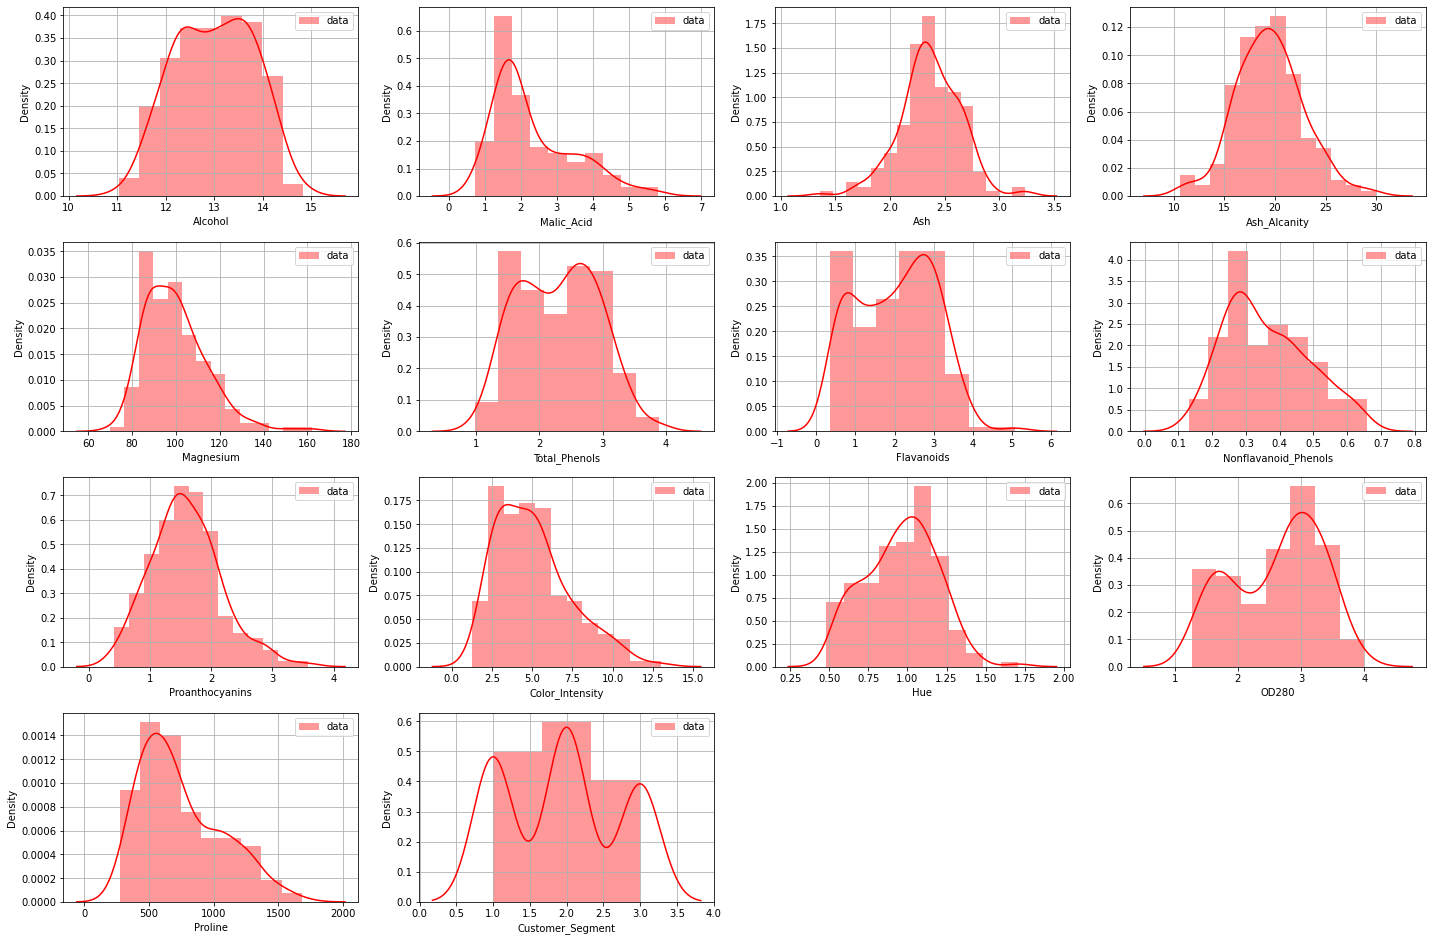

In [11]:
plt.figure(figsize=(20,16))

for i, col in enumerate(list(data.columns.values)):
    plt.subplot(5,4,i+1)
    sns.distplot(data[col],color="r",kde=True, label="data")
    plt.grid()
    plt.legend(loc="upper right")
    plt.tight_layout()

## 4.2 Heatmap

### 4.2.1 Heat map para correlación entre variables

Los mapas de calor son tipo de diagrama que resulta de gran utilidad cuando necesitamos encontrar las variables dependientes.

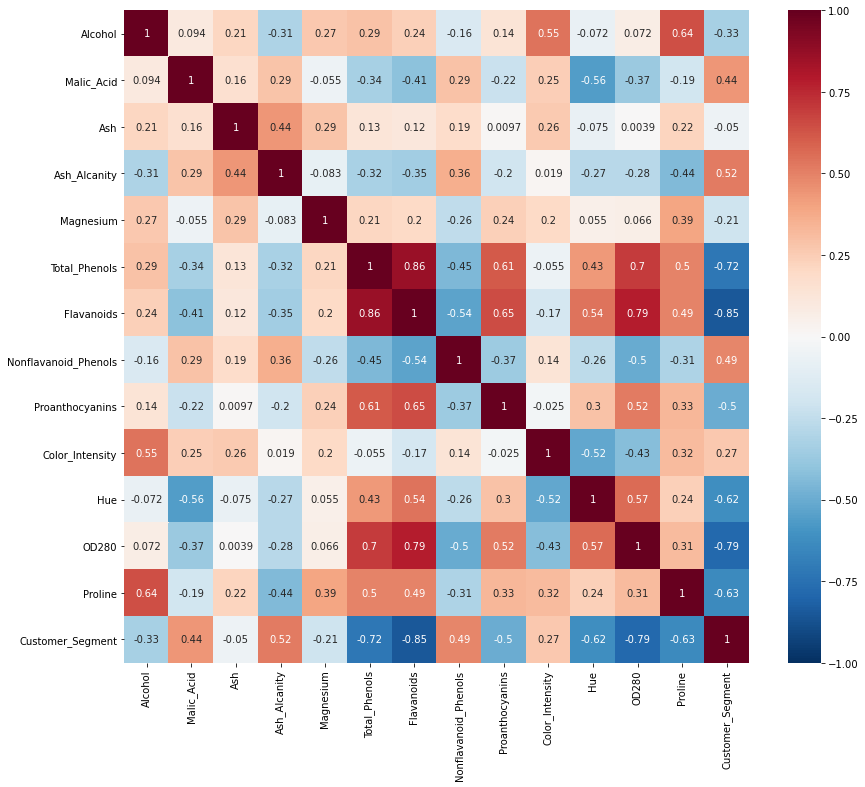

In [27]:
correlation =data.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0,vmin=-1, cmap="RdBu_r")

En el gráfico anterior se puede apreciar que las variables que tiene mayor correlación entre si son Alcohol,Proline, que es del 0.64; Flavanoids y OD280 del 0.79; Flavanoids y Total_Phenol del 0.86; Alcohol y Color_Intensity del 0.55; Hue y Malic_Acid del -0.52. Para detallar estas relaciones, vamos es realizar un gráfico para cada par de variables.

### 4.2.1 Visualización entre Alcohol y Prolina

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


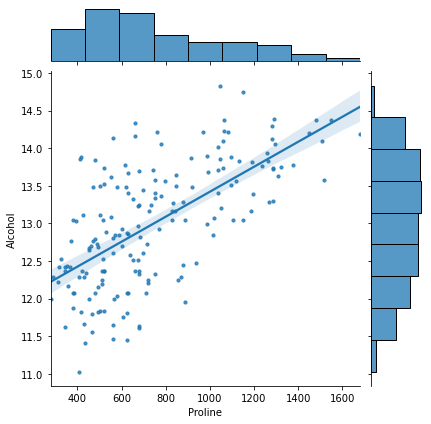

In [28]:
alcohol_Pro = data[['Alcohol','Proline']]
gridA = sns.JointGrid(x='Proline', y='Alcohol', data=alcohol_Pro, size=6)
gridA = gridA.plot_joint(sns.regplot,scatter_kws={"s":10})
gridA = gridA.plot_marginals(sns.histplot)

### 4.2.2 Visualización entre Flavonoides y OD280

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


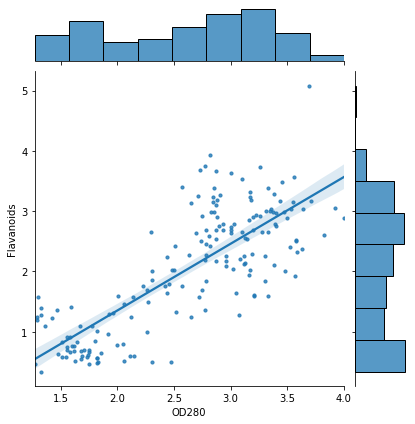

In [29]:
Flavanoids_OD280 = data[['Flavanoids','OD280']]
gridA = sns.JointGrid(x='OD280', y='Flavanoids', data=Flavanoids_OD280, size=6)
gridA = gridA.plot_joint(sns.regplot,scatter_kws={"s":10})
gridA = gridA.plot_marginals(sns.histplot)

### 4.2.3 Visualización entre Flavonoides y Fenoles totales

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


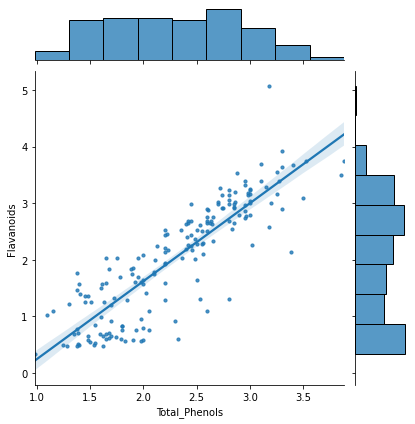

In [30]:
Flavanoids_Total_Phenols = data[['Flavanoids','Total_Phenols']]
gridA = sns.JointGrid(x='Total_Phenols', y='Flavanoids', data=Flavanoids_Total_Phenols, size=6)
gridA = gridA.plot_joint(sns.regplot,scatter_kws={"s":10})
gridA = gridA.plot_marginals(sns.histplot)

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


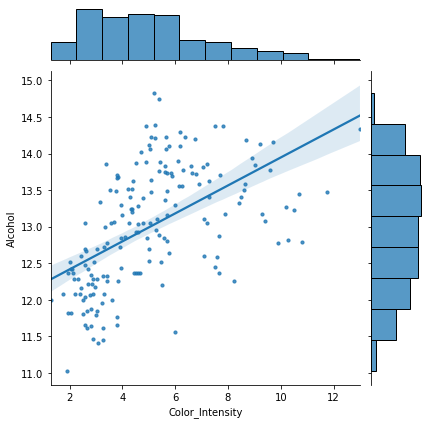

In [31]:
Alcohol_Color_Intensity = data[['Alcohol','Color_Intensity']]
gridA = sns.JointGrid(x='Color_Intensity', y='Alcohol', data=Alcohol_Color_Intensity, size=6)
gridA = gridA.plot_joint(sns.regplot,scatter_kws={"s":10})
gridA = gridA.plot_marginals(sns.histplot)

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


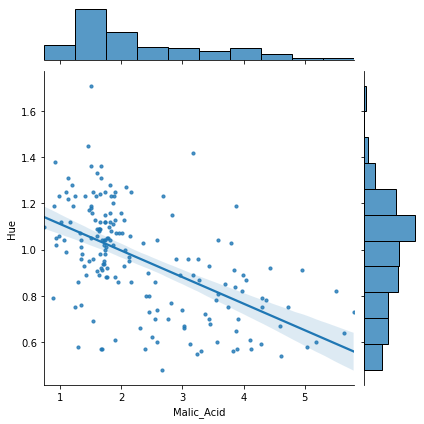

In [32]:
Hue_Malic = data[['Hue','Malic_Acid']]
gridA = sns.JointGrid(x='Malic_Acid', y='Hue', data=Hue_Malic, size=6)
gridA = gridA.plot_joint(sns.regplot,scatter_kws={"s":10})
gridA = gridA.plot_marginals(sns.histplot)

## 4.3 Boxplots

Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. A menudo es una buena idea detectar y eliminar los valores atípicos. Porque los valores atípicos son una de las principales razones para obtener como resultado un modelo menos preciso.

C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\U6075486\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\U6075486\An

<AxesSubplot:xlabel='Proline'>

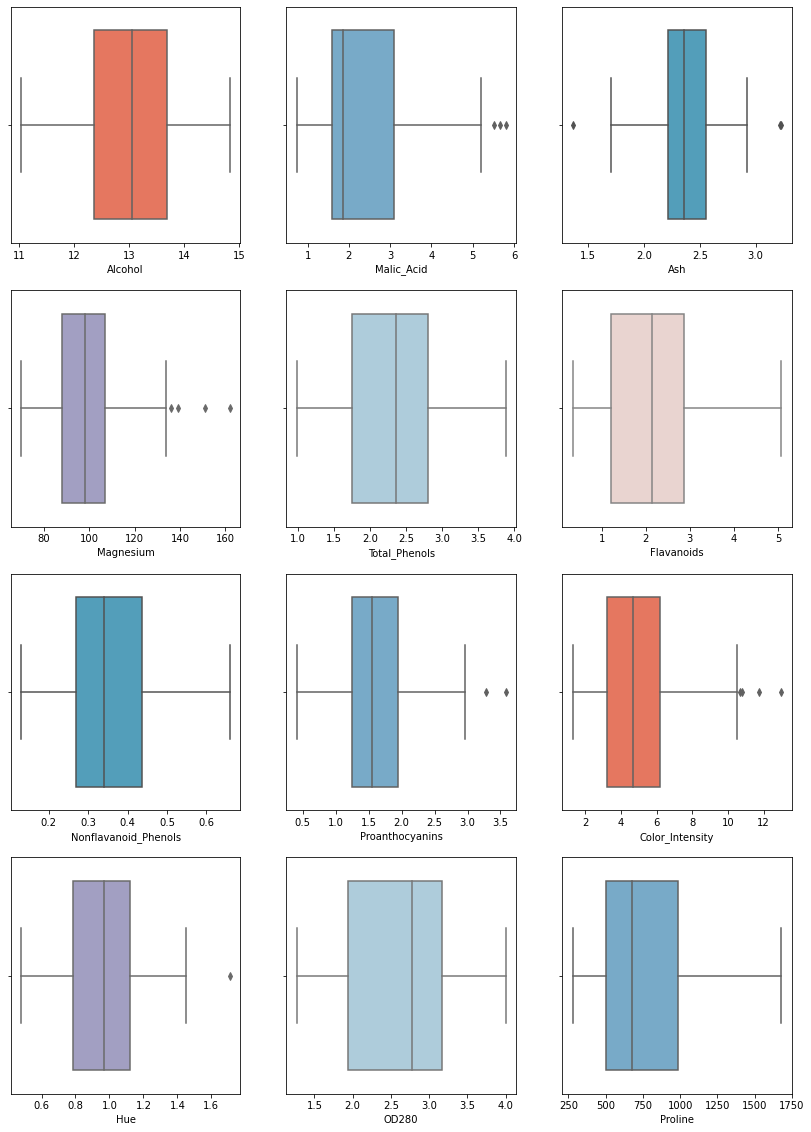

In [33]:
f, axes = plt.subplots(4, 3, figsize=(14, 20))

sns.boxplot(x= 'Alcohol', data=data, orient='v' , ax=axes[0][0], palette="Reds")
sns.boxplot(x= 'Malic_Acid', data=data, orient='v' , ax=axes[0][1], palette="Blues")
sns.boxplot(x= 'Ash', data=data, orient='v' , ax=axes[0][2], palette="GnBu_d")
sns.boxplot(x= 'Magnesium', data=data, orient='v' , ax=axes[1][0], palette="Purples")
sns.boxplot(x= 'Total_Phenols', data=data, orient='v' , ax=axes[1][1], palette="Paired")
sns.boxplot(x= 'Flavanoids', data=data, orient='v' , ax=axes[1][2], palette=sns.cubehelix_palette(8))
sns.boxplot(x= 'Nonflavanoid_Phenols', data=data, orient='v' , ax=axes[2][0], palette="GnBu_d")
sns.boxplot(x= 'Proanthocyanins', data=data, orient='v' , ax=axes[2][1], palette="Blues")
sns.boxplot(x= 'Color_Intensity', data=data, orient='v' , ax=axes[2][2], palette="Reds")
sns.boxplot(x= 'Hue', data=data, orient='v' , ax=axes[3][0], palette="Purples")
sns.boxplot(x= 'OD280', data=data, orient='v' , ax=axes[3][1], palette="Paired")
sns.boxplot(x= 'Proline', data=data, orient='v' , ax=axes[3][2], palette="Blues")

Se puede apreciar la existencia de ciertos valores atípicos en algunos de los boxplots utilizados; principalmennte en 
Alcohol, Malic_Acid, Ash, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols,Proanthocyanins, Color_Intensity, Hue, OD280, Proline.

Es importante, de cara a los modelos que se utilicen, saber que en esas variables existen anomalías que pueden influir en las predicciones realizadas. En este caso, debido a que no hay muchos datos y a que las anomalías representan información relevante de algunos individuos en concreto, se van a dejar como están.

# K means clustering

In [34]:
X = data[['Flavanoids','Total_Phenols']].values
data_2 = data.loc[ :, ['Flavanoids','Total_Phenols']]

In [35]:
def elbow_method(epsilon, figure=False):
    wcss = [] # Pongo un vector a 0 para ver los distintos wcss segun el numero de clusters que defina
    
    diff = np.inf # Valor de diferencia entre dos iteraciones
    i = 1
    
    while diff > epsilon:
        print("Iteracion Nº Clusters: k: {k}".format(k=i))
        
        # Con init=k-means++ y con n_init defino que quiero usar la opcion de ++ (que tiene en cuenta la posicion inicial y su influencia) 
        # y que tome 10 posiciones iniciales para comparar
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X)
        
        # Primera iteracion
        if diff == np.inf:
            diff = kmeans.inertia_
        # Si ya fuese 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Resto de iteraciones
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1
    
    if figure:
        plt.plot(range(0,len(wcss)), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Numbero de Clusters')
        plt.ylabel('WCSS')
        plt.show()
    
    # Clusters finales
    k = i-1
    return wcss, k

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4
Iteracion Nº Clusters: k: 5
Iteracion Nº Clusters: k: 6
Iteracion Nº Clusters: k: 7
Iteracion Nº Clusters: k: 8
Iteracion Nº Clusters: k: 9
Iteracion Nº Clusters: k: 10
Iteracion Nº Clusters: k: 11
Iteracion Nº Clusters: k: 12
Iteracion Nº Clusters: k: 13
Iteracion Nº Clusters: k: 14
Iteracion Nº Clusters: k: 15
Iteracion Nº Clusters: k: 16


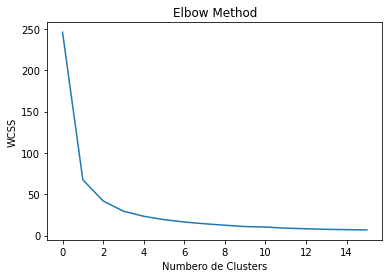

In [36]:
epsilon = 0.05 # Valor umbral
wcss, _ = elbow_method(epsilon, figure=True)

In [37]:
# Obtencion de la k optima
epsilon = 0.33
_, k = elbow_method(epsilon, figure=False)

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4


In [61]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit_predict(X) 

array([2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 3, 1, 3, 1, 3, 3, 1,
       3, 3, 1, 1, 2, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2,
       2, 1])

In [62]:
print(kmeans.predict(X))
centros = np.array(kmeans.cluster_centers_)
print(centros)

[2 2 0 0 1 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 1 1 2 2 2 2 0 0 2 2 0 0 2 0 2 2 2
 2 2 1 1 2 2 1 2 2 2 2 2 0 2 0 0 0 2 2 2 0 0 3 1 3 1 3 3 1 3 3 1 1 2 3 3 2
 2 3 3 3 1 3 3 1 1 3 3 3 3 1 1 1 3 3 3 3 3 2 1 3 1 3 1 1 3 3 1 3 3 3 3 1 1
 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 1 2 2 3 1
 1 1 3 3 3 1 1 1 3 2 1 1 3 1 1 1 1 3 1 1 1 1 3 3 1 1 1 2 2 1]
[[1.38600000e+01 1.79391304e+00 2.50695652e+00 1.70739130e+01
  1.06000000e+02 2.94304348e+00 3.11086957e+00 2.98695652e-01
  1.92608696e+00 6.26000000e+00 1.10000000e+00 3.03565217e+00
  1.33856522e+03]
 [1.28700000e+01 2.69762712e+00 2.37932203e+00 2.02406780e+01
  9.98305085e+01 2.02762712e+00 1.42728814e+00 4.04237288e-01
  1.43491525e+00 5.55152542e+00 8.70508475e-01 2.27016949e+00
  6.59220339e+02]
 [1.34594872e+01 2.12589744e+00 2.39076923e+00 1.81256410e+01
  1.07641026e+02 2.59435897e+00 2.53282051e+00 3.03589744e-01
  1.80820513e+00 5.21923077e+00 1.00041026e+00 2.97666667e+00
  9.85589744e+02]
 [1.24750877e+01 2.3252631

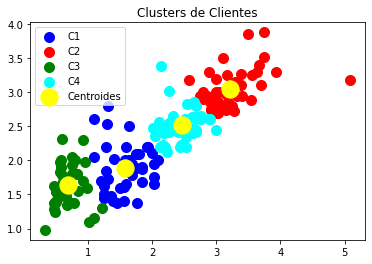

In [42]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'C4')


# Para pintar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Clientes')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

# Análisis de Componentes Principales (PCA)

In [43]:
dataset_f = data[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment']].dropna()

In [44]:
dataset_f.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [45]:
X = dataset_f.iloc[:, 0:len(dataset_f.columns)-1].values
y = dataset_f.iloc[:, len(dataset_f.columns)-1].values

In [46]:
#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
### PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None) # 'None' para que conserven en principio todas las PC

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [49]:
explained_variance =pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
var_exp = np.round(np.sum(explained_variance[0:5]),4)
print("Con 5 PC se explicaría el {var}% de la varianza".format(var=var_exp*100))
# Con los 5 ppales, se ve que el 65.3% de la varianza

Varianza Explicada por cada PC
[0.37281068 0.18739996 0.10801208 0.07619859 0.06261922 0.04896412
 0.0417445  0.02515945 0.02340805 0.0184892  0.01562956 0.01269224
 0.00687236]
Con 5 PC se explicaría el 80.7% de la varianza


In [50]:
# Se entrena solo para esas 5 componentes principales
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

Varianza Explicada por cada PC
[0.37281068 0.18739996 0.10801208 0.07619859 0.06261922]
Parámetros del Modelo
[[ 1.42852634e-01 -2.44434413e-01 -1.39210408e-02 -2.45173609e-01
   1.31509900e-01  3.89237341e-01  4.24717659e-01 -3.01286131e-01
   3.05234648e-01 -1.04621061e-01  3.02671492e-01  3.72667371e-01
   2.91508673e-01]
 [-5.01940708e-01 -2.30158317e-01 -3.10223108e-01  3.87224832e-02
  -2.38589517e-01 -9.68872863e-02 -1.45147416e-02 -3.69392554e-02
  -5.84635001e-02 -5.42407983e-01  2.81680639e-01  1.69440355e-01
  -3.51822626e-01]
 [ 1.27907215e-01 -1.04790656e-01 -6.43404454e-01 -6.10427752e-01
  -5.26551565e-02 -1.73174486e-01 -1.28754857e-01 -1.69279358e-01
  -1.62495414e-01  1.43574853e-01 -9.64900666e-02 -1.85390289e-01
   1.31809175e-01]
 [-2.25047541e-01 -7.61738847e-02 -2.26172497e-04  8.77037359e-02
   8.29065957e-01 -1.92669042e-01 -1.27234281e-01 -3.86564961e-01
   6.41717123e-02 -9.78367502e-02 -4.49061491e-02 -1.63673849e-01
  -5.71897314e-02]
 [-1.86993946e-01  5.5

<AxesSubplot:xlabel='PC', ylabel='var'>

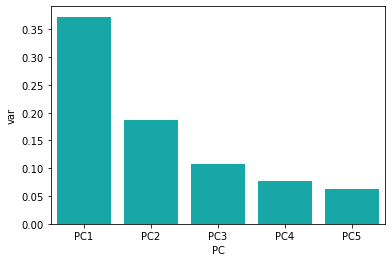

In [51]:
# Visualizacion de las PC
sns.barplot(x='PC',y="var", 
           data=pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4', 'PC5']}), color="c")

In [52]:
### Modelo de Regresión
# Con las PCA se construye un modelo de regresión

# Regresion Lineal
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_pca).fit()
model.summary() # Se ve que la PC realmente relevante es solo la primera

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.116
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              3.376
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                     0.00674
Time:                        20:36:59   Log-Likelihood:                         -281.00
No. Observations:                 133   AIC:                                      572.0
Df Residuals:                     128   BIC:                                      586.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3245      0.080     -4.038      0.000      -0.483      -0.165
x2            -0.0117      0.113     -0.104      0.918      -0.236       0.213
x3             0.0049      0.149      0.033      0.974      -0.290       0.300
x4             0.1141      0.178      0.642      0.522      -0.238       0.466
x5             0.0761      0.196      0.388      0.699      -0.312       0.464
==============================================================================
Omnibus:                        1.322   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.999
Skew:                          -0.204   Prob(JB):                        0.607
Kurtosis:                       3.119   Cond. No.                         2.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# RF
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca, y_train)
print("Relevancia de los parámetros")
print(model.feature_importances_) # Aparentemente con la primera componente artificial construida es suficiente

Relevancia de los parámetros
[0.6855439  0.28596123 0.00526613 0.01987916 0.00334958]


In [54]:
# Predicciones
y_pred = model.predict(X_test_pca)

# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

r2:  0.9489630905511811 mae:  0.025606666666666663


In [55]:
# Usando solo 1 PC
pca = PCA(n_components = 1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

Varianza Explicada por cada PC
[0.37281068]
Parámetros del Modelo
[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]]


In [56]:
model = RandomForestRegressor(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae) # Mejoran, de hecho, los resultados

r2:  0.7004310458018679 mae:  0.1503022506001493


In [57]:
# Usando 2 PC para visualizar
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

Varianza Explicada por cada PC
[0.37281068 0.18739996]
Parámetros del Modelo
[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]
 [-0.50194071 -0.23015832 -0.31022311  0.03872248 -0.23858952 -0.09688729
  -0.01451474 -0.03693926 -0.0584635  -0.54240798  0.28168064  0.16944035
  -0.35182263]]


In [58]:
model = RandomForestRegressor(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

r2:  0.9528680287620297 mae:  0.02364744828532236


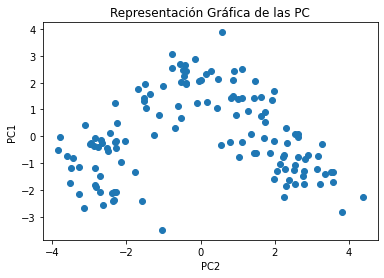

In [59]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.title("Representación Gráfica de las PC")
plt.show()